# Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 1: Review of the core modules NumPy, Pandas, and Matplotlib

##### Excercise 1
Use the adult.csv dataset and run the codes shown in the following Screenshots. Then answer the questions.

In [2]:
import pandas as pd
import numpy as np
adult_df = pd.read_csv('adult.csv')
adult_df.set_index(np.arange(10000,42561),inplace=True)

print(adult_df.iloc[5:7,0:2])

print(adult_df.loc['10005':'10007','age':'fnlwgt'])

adult_df.head(1)

       age workclass
10005   37   Private
10006   49   Private
       age         workclass  fnlwgt
10005   37           Private  284582
10006   49           Private  160187
10007   52  Self-emp-not-inc  209642


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
10000,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


    a) Use the output to answer what is the difference in the behavior of .loc and .iloc when it comes to slicing.
    b)	Without running but by only looking at the data, what will be the output of adult_df.loc['10000':'10003', 'relationship':'sex'].
    c)	Without running but by only looking at the data, what will be the output of adult_df.iloc[0:3, 7:9].


In [ ]:
#a - .iloc is exclusive, while .loc is inclusive

#b -  It will be 4 rows, 10000, 10001, 10002, and 10003, and their columbs will be relationship, race, and sex

#c - it be 3 rows, 10000, 10001, and 10002, and their columbs will be relationship and race

##### Excercise 2 

For adult_df use the .groupby() function to run the following code and create the multi-index Series mlt_sr.

In [23]:
import pandas as pd

adult_df = pd.read_csv('adult.csv')
mlt_seris =adult_df.groupby(['race','sex','income']).fnlwgt.mean()
mlt_seris

race                sex     income
Amer-Indian-Eskimo  Female  <=50K     109018.626168
                            >50K      148012.000000
                    Male    <=50K     126428.767857
                            >50K      120721.541667
Asian-Pac-Islander  Female  <=50K     148165.333333
                            >50K      142426.093023
                    Male    <=50K     163885.130435
                            >50K      170698.347639
Black               Female  <=50K     213411.580205
                            >50K      205806.033333
                    Male    <=50K     242343.990566
                            >50K      245390.356902
Other               Female  <=50K     173235.932039
                            >50K      160223.333333
                    Male    <=50K     214891.832168
                            >50K      204551.736842
White               Female  <=50K     183485.120961
                            >50K      184030.255837
                    Male    <

Now that you have created a multi-index Series, run the following codes, study the outputs, and answer the questions.

    a) Run the code below first and then answer the following. When we use .iloc[] for a multi-index Series or DataFrame, what should we expect?

In [6]:
print(mlt_seris.iloc[0])
print(mlt_seris.iloc[1])
print(mlt_seris.iloc[2])

109018.6261682243
148012.0
126428.76785714286


Answer: Given this argument of just the row index, I would epect to see the entire row, i.e. the race, sex, and income columns for each group_by value, not just the value by itself. 

    b) Run the code below first and then answer the following. When we use .loc[] to access the data of one of the inner most index level of multi-index Series, what should we expect?

In [24]:
mlt_seris.loc['Other']

sex     income
Female  <=50K     173235.932039
        >50K      160223.333333
Male    <=50K     214891.832168
        >50K      204551.736842
Name: fnlwgt, dtype: float64

Answer: I would expect to see all of the columbs for the rows whose race is "Other"

    c)	 Run the codes below first and then answer the following. When we use .loc[] to access the data of one of non inner most index level of multi-index Series, what should we expect? 

    When you run either line of code below, you will get an error and that is the point of this question. Study the error and try to answer the question. 

In [12]:
mlt_seris.loc['Female']

KeyError: 'Female'

In [13]:
mlt_seris.loc['<=50K']

KeyError: '<=50K'

Answer: Any attempt to query a columb that isnt't the first will be met with an error. This is because if you don't specify the columb, pandas assumes you are querying the first columb. The error returned is essentially "we did not find any element that mached the pattern you gave us". 

    d)	Run the codes below first and then answer the following. How is using .loc[] or .iloc[] different when working with a multi-index Series or a DataFrame?


In [8]:
print(mlt_seris.loc['Other']['Female']['<=50K'])
print(mlt_seris.iloc[12])

173235.93203883496
173235.93203883496


Answer: For a multi-index series, .iloc will only grab the group_by results, not any of the meta data. However, .loc will need you to specify the query enough so that only the group_by results are left, hence why you have to specify other, female, and <=50k in order to get the same value as iloc. 

##### Excercise 3
For this exercise you need to use a new dataset: billboard.csv. Visit https://www.billboard.com/charts/hot-100 and see the latest song rankings of the day. This dataset presents information and ranking of 317 song tracks in 80 columns. The first four columns are artist, track, time, and date_e. The first columns are intuitive descriptions of song tracks. The column date_e shows the date that the songs entered the hot-100 list. The rest of 76 columns are songs ranking at the end of each weeks from 'w1' to 'w76'. Download and read this dataset using pandas and answer the following questions.

In [24]:
song_csv = pd.read_csv("billboard.csv")

    a)	Write one line of code that gives you a great idea of how many null values each column has. If there are any columns that have no non-null values drop them. 

In [31]:
null_count = song_csv.isna().sum()

for row in null_count.items():
    if row[1] != 0:
        song_csv = song_csv.drop(row[0], axis = 1)

print(song_csv.head())

                artist                                  track  time  \
0      Destiny's Child               Independent Women Part I  3:38   
1              Santana                           Maria, Maria  4:18   
2        Savage Garden                     I Knew I Loved You  4:07   
3              Madonna                                  Music  3:45   
4  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

       date_e  w1  
0  2000-09-23  78  
1  2000-02-12  15  
2  1999-10-23  71  
3  2000-08-12  41  
4  2000-08-05  57  


    b)	With a for loop, draw and study the values in each of the remaining W columns.

228
317


<AxesSubplot: ylabel='Frequency'>

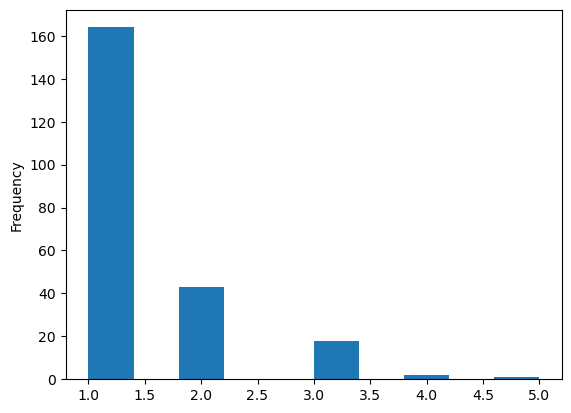

In [75]:
import matplotlib
song_csv.head()

print(len(song_csv["artist"].unique()))
print(len(song_csv))

val_count = song_csv['artist'].value_counts()

val_count.plot.hist()




    c)	The dataset is in wide format, use an appropriate function to switch to a long fromat, and name the melted dataframe mlt_df.

In [99]:
song_csv = pd.read_csv("billboard.csv")
song_csv.head()


mlt_df = pd.melt(song_csv, id_vars=['artist', "track", "time", "date_e"], value_vars=song_csv.columns[4:])

mlt_df


,artist,track,time,date_e,variable,value
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,w1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,w1,15.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,w1,71.0
3,Madonna,Music,3:45,2000-08-12,w1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,w1,57.0
...,...,...,...,...,...,...
24087,Ghostface Killah,Cherchez LaGhost,3:04,2000-08-05,w76,NaN
24088,"Smith, Will",Freakin' It,3:58,2000-02-12,w76,NaN
24089,Zombie Nation,Kernkraft 400,3:30,2000-09-02,w76,NaN
24090,"Eastsidaz, The",Got Beef,3:58,2000-07-01,w76,NaN


    d)	Write a code that shows mlt_df‘s every 1200 rows.

In [100]:
mlt_df.iloc[::1200]

,artist,track,time,date_e,variable,value
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,w1,78.0
1200,Limp Bizkit,N 2 Gether Now,3:55,1999-12-04,w4,78.0
2400,"Urban, Keith",Your Everything,4:10,2000-07-15,w8,59.0
3600,Mary Mary,Shackles (Praise You),3:12,2000-03-25,w12,39.0
4800,Pink,There U Go,3:23,2000-03-04,w16,14.0
6000,"Levert, Gerald",Baby U Are,4:10,2000-08-19,w19,NaN
7200,Jay-Z,Do It Again (Put Ya Hands Up),3:47,2000-01-15,w23,NaN
8400,"Tippin, Aaron",Kiss This,2:53,2000-08-26,w27,NaN
9600,"Rimes, LeAnn",Big Deal,3:03,1999-10-16,w31,NaN
10800,98¡,Give Me Just One Night (Una Noche),3:24,2000-08-19,w35,NaN


    e)	Run the following code first and answer the question. Could you have done this by using Boolean masking too?

In [101]:
mlt_df.query('artist == "Spears, Britney"')

,artist,track,time,date_e,variable,value
51,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w1,67.0
63,"Spears, Britney",From The Bottom Of My Broken Heart,4:30,2000-01-29,w1,76.0
93,"Spears, Britney",Lucky,3:23,2000-08-12,w1,61.0
368,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w2,38.0
380,"Spears, Britney",From The Bottom Of My Broken Heart,4:30,2000-01-29,w2,59.0
...,...,...,...,...,...,...
23521,"Spears, Britney",From The Bottom Of My Broken Heart,4:30,2000-01-29,w75,NaN
23551,"Spears, Britney",Lucky,3:23,2000-08-12,w75,NaN
23826,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w76,NaN
23838,"Spears, Britney",From The Bottom Of My Broken Heart,4:30,2000-01-29,w76,NaN


Could have done this by using Boolean masking too?

Answer:Yes

In [102]:
mlt_df[mlt_df["artist"] == "Spears, Britney"]

,artist,track,time,date_e,variable,value
51,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w1,67.0
63,"Spears, Britney",From The Bottom Of My Broken Heart,4:30,2000-01-29,w1,76.0
93,"Spears, Britney",Lucky,3:23,2000-08-12,w1,61.0
368,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w2,38.0
380,"Spears, Britney",From The Bottom Of My Broken Heart,4:30,2000-01-29,w2,59.0
...,...,...,...,...,...,...
23521,"Spears, Britney",From The Bottom Of My Broken Heart,4:30,2000-01-29,w75,NaN
23551,"Spears, Britney",Lucky,3:23,2000-08-12,w75,NaN
23826,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w76,NaN
23838,"Spears, Britney",From The Bottom Of My Broken Heart,4:30,2000-01-29,w76,NaN


    f)	 Use either the approach in e or the Boolean mask, to extract all the unique songs that Britney Spears has in this dataset.

In [104]:
mlt_df.query('artist == "Spears, Britney"')["track"].unique()

array(['Oops!.. I Did It Again', 'From The Bottom Of My Broken Heart',
       'Lucky'], dtype=object)

    g)	In mlt_df show all of the weeks that the song “Oops!.. I Did It Again” was on the top-100

In [113]:
mlt_df = mlt_df.query('track == "Oops!.. I Did It Again" ')

mlt_df.loc[mlt_df["value"].notna()]

,artist,track,time,date_e,variable,value
51,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w1,67.0
368,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w2,38.0
685,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w3,26.0
1002,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w4,19.0
1319,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w5,15.0
1636,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w6,13.0
1953,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w7,12.0
2270,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w8,9.0
2587,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w9,9.0
2904,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w10,10.0


##### Excercise 4 

We will use LaqnData.csv for this exercise. Each row of this dataset shows an hourly measurement recording of one of the five following air pollutants: NO, NO2, NOX, PM10, and PM2.5. The data was collected in a location in Londan for the entirety of year 2017. Read the data using Pandas and perform the following tasks.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

air_df = pd.read_csv('LaqnData.csv')
air_df

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R
...,...,...,...,...,...,...
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R


    a)	The dataset has 6 columns. Three of them, naming ‘Site','Units','Provisional or Ratified' are not adding any informational values as they are the same across the whole dataset. Use the following code to drop them. 

In [3]:
air_df.drop(columns=['Site','Units','Provisional or Ratified'], inplace=True)

    b)	The dataset is in a long format. Apply the appropriate function to switch it to the wide format. Name the transformed Dataframe, pvt_df. 

In [4]:
air_df
pvt_df = air_df.pivot(index="Species", columns="ReadingDateTime", values="Value")

    c)	Draw and study the histogram and boxplots for columns of pvt_df.

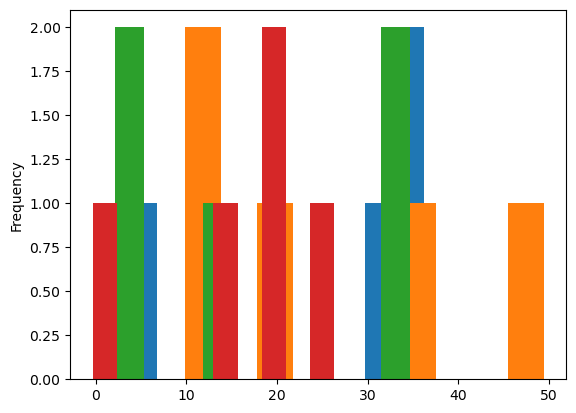

<AxesSubplot: >

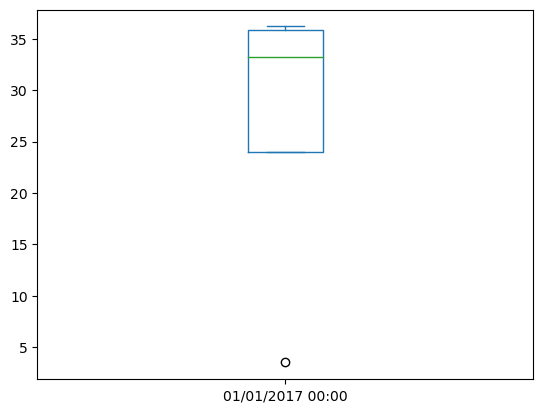

In [29]:
#why do you care about columns? Wouldn't wou want to di this on the rows? Whaterver, here you are

pvt_df.head()
pvt_df["01/01/2017 00:00"].plot.hist()
pvt_df["01/02/2017 00:00"].plot.hist()
pvt_df["01/03/2017 00:00"].plot.hist()
pvt_df["01/04/2017 00:00"].plot.hist()
plt.show()

pvt_df["01/01/2017 00:00"].plot.box()



##### Excercise 5 

We will continue working with LaqnData.csv. 

    a)	Run the following code, see its output, and then study the code to answer what each line of this code does.

In [11]:
import pandas as pd
air_df = pd.read_csv('LaqnData.csv')
air_df.drop(columns=['Site','Units','Provisional or Ratified'], inplace=True)
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
datetime_df.columns = ['Date','Time']
date_df = datetime_df.Date.str.split('/',expand=True)
date_df.columns = ['Day','Month','Year']
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
air_df

,Species,Value,Day,Month,Time
0,NO,3.5,01,01,00:00
1,NO,3.6,01,01,01:00
2,NO,2.2,01,01,02:00
3,NO,2.1,01,01,03:00
4,NO,3.3,01,01,04:00
...,...,...,...,...,...
43795,PM2.5,-2.0,31,12,19:00
43796,PM2.5,6.0,31,12,20:00
43797,PM2.5,5.0,31,12,21:00
43798,PM2.5,5.0,31,12,22:00


Answer: 

In [15]:
air_df = pd.read_csv('LaqnData.csv')#Read in the csv
air_df.drop(columns=['Site','Units','Provisional or Ratified'], inplace=True)#drop selected columns
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)#split the REadingDateTime column into two columns with " " as delimiter
datetime_df.columns = ['Date','Time']# give the two default columns created by the split to 'Date' and 'Time'
date_df = datetime_df.Date.str.split('/',expand=True)#split date into 3 columns with / as delimter
date_df.columns = ['Day','Month','Year']#give the split date columns the column names of Day, Month, and Year
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])# join the date_df and datetime_df to the air_df
air_df#display final df

,Species,Value,Day,Month,Time
0,NO,3.5,01,01,00:00
1,NO,3.6,01,01,01:00
2,NO,2.2,01,01,02:00
3,NO,2.1,01,01,03:00
4,NO,3.3,01,01,04:00
...,...,...,...,...,...
43795,PM2.5,-2.0,31,12,19:00
43796,PM2.5,6.0,31,12,20:00
43797,PM2.5,5.0,31,12,21:00
43798,PM2.5,5.0,31,12,22:00


    b)	Run the following code, see its output, and then study the code to answer what does this line of code do.

In [16]:
air_df = air_df.set_index(['Month','Day','Time','Species'])
air_df


Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

Answer: 

In [ ]:
#Month, Day, and Time are no longer columns, but serve as indexs for the values given to each observation of each species at a given time

    c)	Run the following code, see its output, and then study the code to answer what does this line of code do.

In [17]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

Answer:

In [19]:
#unstack the index so that each row corresponds to a time, rather than a individual sample. 
# Each row now represetns all samples taken at a given time/ 

Month  Day  Time   Species
01     01   00:00  NO         3.5
            01:00  NO         3.6
            02:00  NO         2.2
            03:00  NO         2.1
            04:00  NO         3.3
                             ... 
12     31   19:00  PM2.5     -2.0
            20:00  PM2.5      6.0
            21:00  PM2.5      5.0
            22:00  PM2.5      5.0
            23:00  PM2.5      6.0
Name: Value, Length: 43800, dtype: float64

    d)	Compare the output of the code above with pvt_df from Exercise 4. Are they basically the same?
    e)	Explain what are the differences and similarities between the pair .melt()/.pivot() and the pair .stack()/.unstack()? 
    f)	If you were to choose one counterpart for .melt() between .stack()/.unstack() which one would you choose?

Answer:

In [22]:
air_df.unstack()

# They are basically the same
# Similariteis are that each table has a series that represents every sample taken at a given time. 
# The difference is that series exists on the rows for air_df.unstack() and on the columns for pvt_df
# I would choose unstack. 

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]